In [1]:
from nbodysims import *
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plot_dir = os.path.join(sys.path[0], 'plots')

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

def save(fig: mpfig.Figure, name: str):
    fig.savefig(os.path.join(plot_dir, f'{name}.pdf'))

C:\Users\fivos\AppData\Local\Temp\ipykernel_32628\750293313.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# INTRODUCTION PLOT

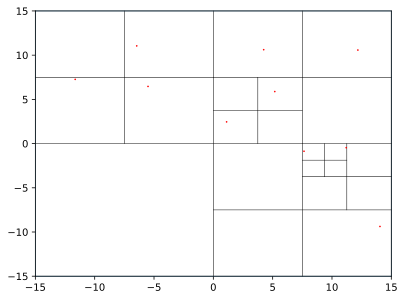

In [2]:
n = 10
x = np.random.uniform(-15, 15, n)
y = np.random.uniform(-15, 15, n)
x = np.array([x, y]).transpose()
m = np.ones(n)

tr = QuadTree(15)
tr.set_particles(x, m)
fig, ax = tr.plot()
save(fig, 'intro')

# COMPARISON OF THE RUNTIME BETWEEN ALL 6 METHODS

0.2 %

99.8 %

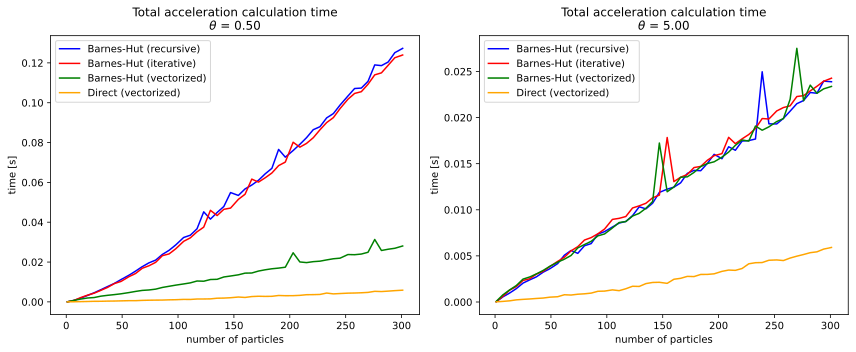

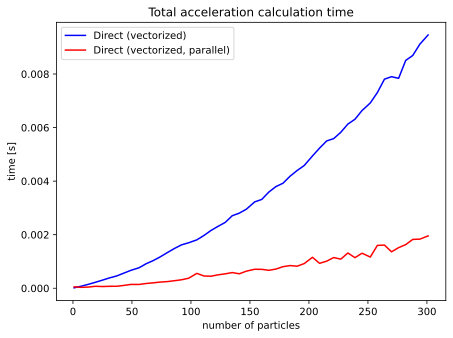

In [4]:
'''
Compare all (3) Barnes-Hut algorithms with the direct (vectorized) method, for theta= 0.5 and 5
'''
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ce1 = ComplexityEstimator(L=10, nmax=1, theta=0.5, epsilon=0.1, dmin=1e-13, i=range(1, 5))
ce1.plot(1, 300, 10, ax[0]);

ce2 = ComplexityEstimator(L=10, nmax=1, theta=5.0, epsilon=0.1, dmin=1e-13, i=range(1, 5))
ce2.plot(1, 300, 10, ax[1]);
for axi in ax:
    axi: plt.Axes
    axi.set_xscale('linear')
    axi.set_yscale('linear')
fig.subplots_adjust(wspace=0.2)
fig.set_tight_layout(True)
save(fig, 'complexity1')

ce1 = ComplexityEstimator(L=10, nmax=1, theta=0.5, epsilon=0.1, dmin=1e-13, i=range(4, 6))
fig1, ax1 = ce1.plot(1, 300, 10);
ax1.set_title('Total acceleration calculation time')
fig1.set_tight_layout(True)
save(fig1, 'complexity2')


# COMPARISON OF TREE-UPDATE RUNTIME AND BH-VECTORIZED METHOD

0 %

99.933 %%%

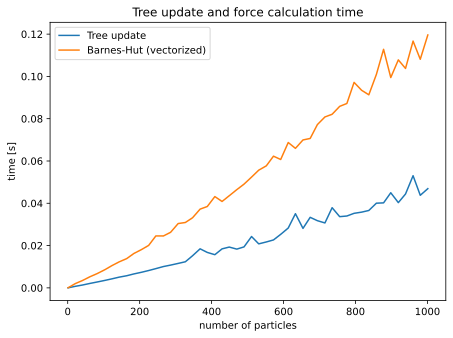

In [4]:
def update_timeit(tree: QuadTree, n1, n2, Ntry=1):
    n = np.linspace(n1, n2+1, min([n2-n1+1, 50]), dtype=int)
    t1 = np.zeros(len(n))
    t2 = np.zeros(len(n))
    for j in range(Ntry):
        for k, ni in enumerate(n):
            x, v, m = Plummer(ni)
            tree.set_particles(x, m)
            t1[k] += timeit(tree.update, x)[0]
            t2[k] += timeit(tree.vdot_bh_vectorized, x)[0]
            pds.tools.fprint(('%.5g' % ((j*len(n) + k)/(len(n)*Ntry)*100))+' %')

    return n, t1/Ntry, t2/Ntry

tr = QuadTree(10, theta=0.5, dmin=1e-10)

fig3, ax3 = plt.subplots()
n, t1, t2 = update_timeit(tr, 1, 1000, Ntry=30)
ax3.plot(n, t1, label='Tree update')
ax3.plot(n, t2, label='Barnes-Hut (vectorized)')
ax3.set_title('Tree update and force calculation time')
ax3.set_xlabel('number of particles')
ax3.set_ylabel('time [s]')
ax3.legend()
fig3.set_tight_layout(True)
save(fig3, 'complexity3')

# ENERGY COMPARISON BETWEEN VERLET AND RK4 FOR N=20 BODIES

0 %

100 %%

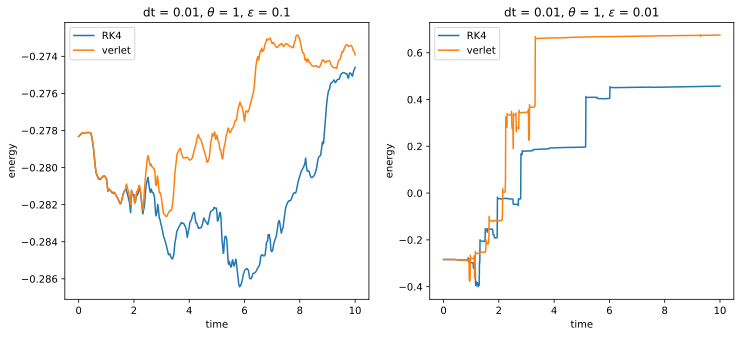

In [5]:
L = 5
dt=0.01
x, v, m = Plummer(20, rmax=L)
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
axes = fig.axes
for eps, ax in [(0.1, axes[0]), (0.01, axes[1])]:
    ax.set_xlabel('time')
    ax.set_ylabel('energy')
    ax.set_title(f'dt = {dt}, ' + r'$\theta$'+f' = {1}, '+ r'$\epsilon$'+f' = {eps}')

for i, eps in enumerate([0.1, 0.01]):
    sim1 = NBodySimulation(x, v, m, L=L, theta=1, epsilon=eps, dmin=1e-10)
    for meth in ['RK4', 'verlet']:
        sim1.get_barnes_hut(t=10, dt=dt, method=meth)
        axes[i].plot(sim1.t, sim1.energy, label=meth)
    axes[i].legend()
        # sim1.fast_animation(duration=10, fps=30, save=f'sim1{m}.mp4');

save(fig, 'N20')

# ANIMATIONS OF N=500 BODIES

### CENTRAL MASS, BARNES-HUT

Animating: 99.8 %

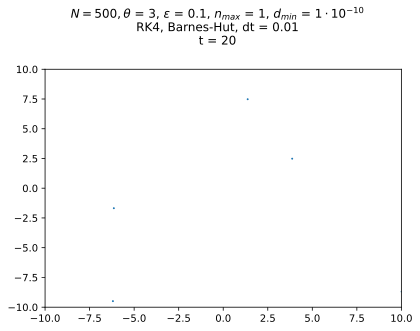

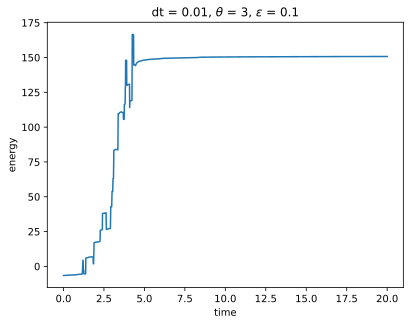

In [6]:
x, v, m = Plummer(500, central_mass=10)
sim = NBodySimulation(x, v, m, L=10, theta=3, epsilon=0.1, dmin=1e-10)
sim.get_barnes_hut(t=20, dt=0.01, method='RK4')
sim.fast_animation(20, 30, 'N500central_bh_spread.mp4')
fig, ax = plt.subplots()
ax.set_xlabel('time')
ax.set_ylabel('energy')
ax.set_title(f'dt = {0.01}, ' + r'$\theta$'+f' = {sim.tree.theta}, '+ r'$\epsilon$'+f' = {sim.tree.epsilon}')
ax.plot(sim.t, sim.energy)
save(fig, 'N500central_bh_spread')

### CENTAL MASS, DIRECT METHOD

Animating: 99.8 %

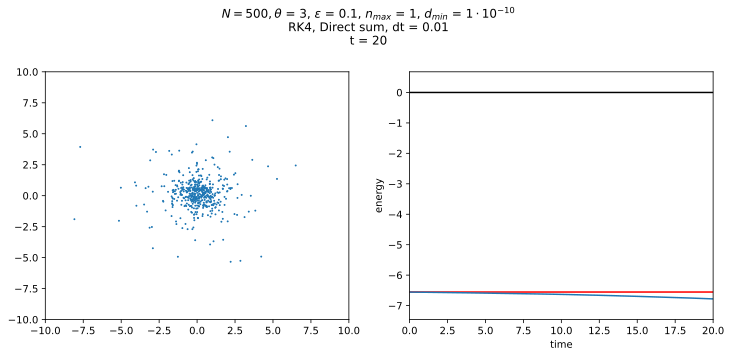

In [7]:
sim.get_direct(t=20, dt=0.01, method='RK4')
sim.fast_animation(20, 30, 'N500central_direct.mp4', plot_energy=True)

### NO CENTRAL MASS (direct, bh with $\theta = 0.7$ and $10$)

Animating: 99.9 %

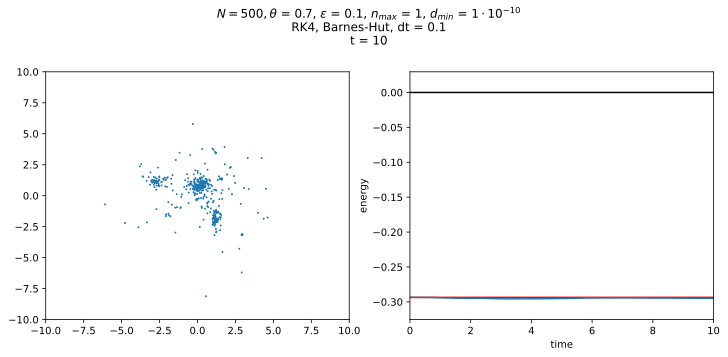

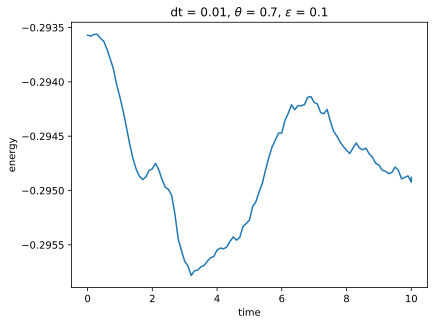

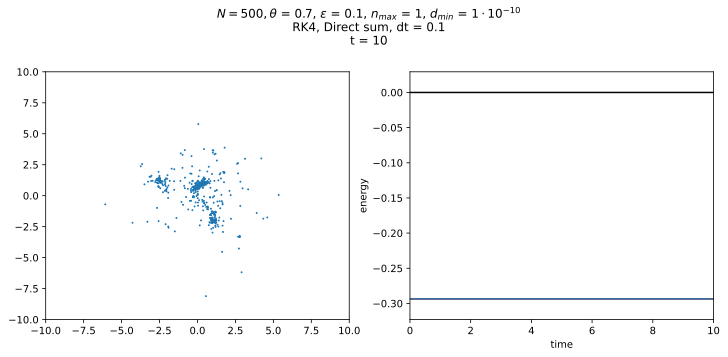

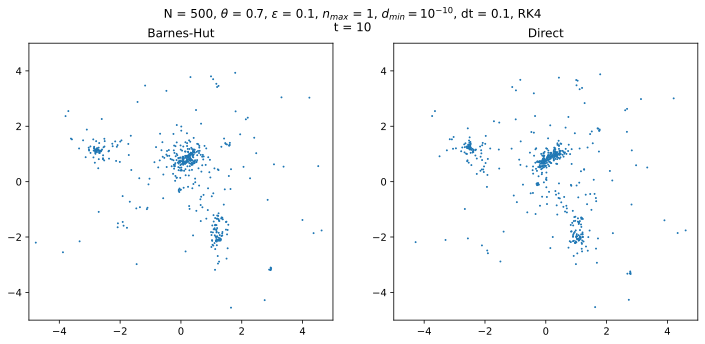

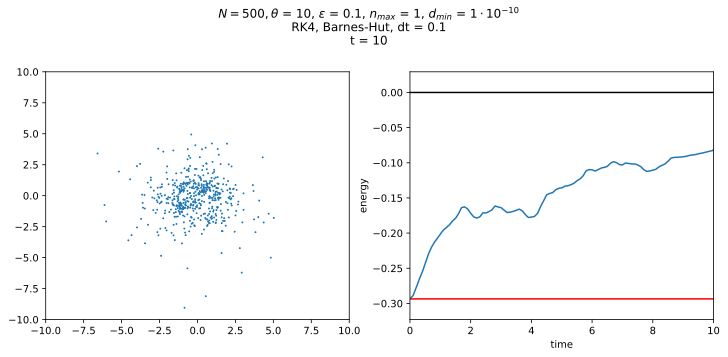

In [8]:
x, v, m = Plummer(500)
sim = NBodySimulation(x, v, m, L=10, theta=0.7, epsilon=0.1, dmin=1e-10)

sim.get_barnes_hut(t=10, dt=0.1, method='RK4')
sim.fast_animation(20, 40, 'N500_bh1.mp4', plot_energy=True);
fig, ax = plt.subplots()
ax.set_xlabel('time')
ax.set_ylabel('energy')
ax.set_title(f'dt = {0.01}, ' + r'$\theta$'+f' = {sim.tree.theta}, '+ r'$\epsilon$'+f' = {sim.tree.epsilon}')
ax.plot(sim.t, sim.energy)
save(fig, 'N500')
x1 = sim.x.copy()
sim.get_direct(t=10, dt=0.1, method='RK4', err=1e-4)
sim.fast_animation(20, 10, 'N500_direct.mp4', plot_energy=True);
x2 = sim.x.copy()

fig2, _ = plt.subplots(ncols=2, figsize=(12, 5))
fig2.axes[0].scatter(x1[:, 0, -1], x1[:, 1, -1], s=1)
fig2.axes[1].scatter(x2[:, 0, -1], x2[:, 1, -1], s=1)
for axi in fig2.axes:
    axi.set_xlim(-5, 5)
    axi.set_ylim(-5, 5)
fig2.suptitle(r'N = 500, $\theta$ = 0.7, $\epsilon$ = 0.1, $n_{max}$ = 1, $d_{min} = 10^{-10}$, dt = 0.1, RK4'+'\nt = 10')
fig2.axes[0].set_title('Barnes-Hut')
fig2.axes[1].set_title('Direct')
save(fig2, 'N500comparison')


sim = NBodySimulation(x, v, m, L=10, theta=10, epsilon=0.1, dmin=1e-10)
sim.get_barnes_hut(t=10, dt=0.1, method='RK4')
sim.fast_animation(20, 40, 'N500_bh2.mp4', plot_energy=True);

# ANIMATION OF N=2000 BODIES

In [ ]:
x, v, m = Plummer(2000, central_mass=10)
v = v*0
sim2000 = NBodySimulation(x, v, m, L=10, theta=0.7, epsilon=0.1, dmin=1e-10)
sim2000.get_direct(20, 0.01, method='RK4')
sim2000.fast_animation(20, 40, 'N2000.mp4')